In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
#Telechargement des data
df=pd.read_excel("Regression multiple.xlsx",sheet_name="Table")

In [4]:
#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mois            12 non-null     int64  
 1   REV             12 non-null     float64
 2   Publicite (X1)  12 non-null     float64
 3   Vendeur (X2)    12 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 512.0 bytes


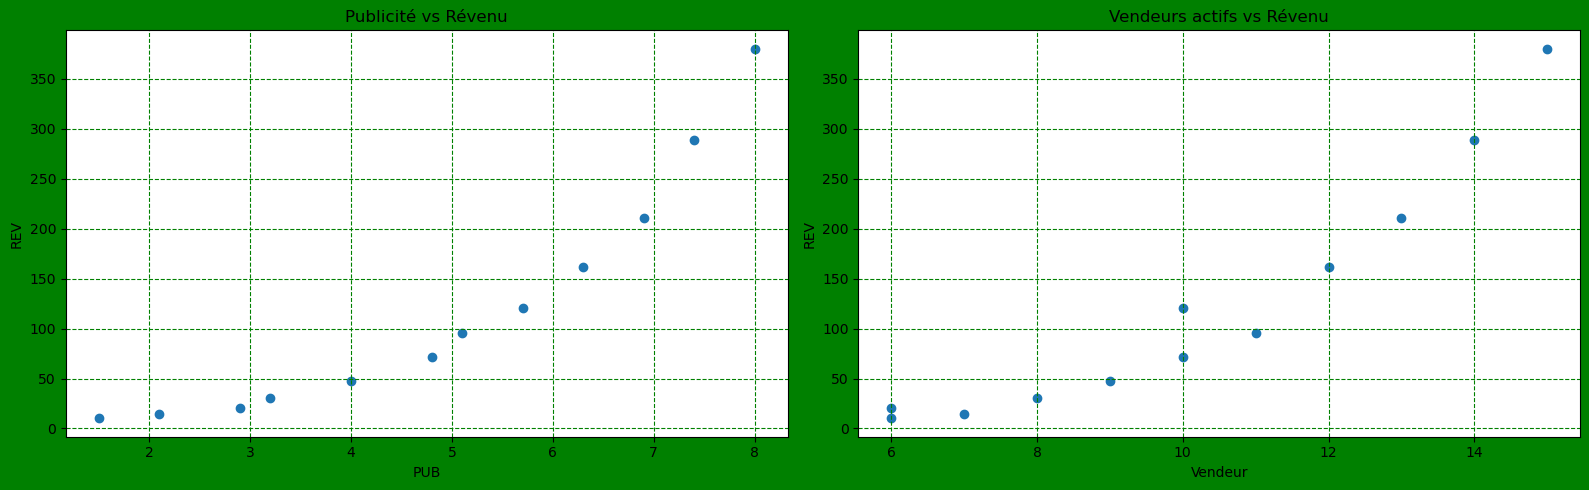

In [5]:
#Visualisation graphique
plt.figure(facecolor="g",figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(df["Publicite (X1)"],df["REV"])
plt.title("Publicité vs Révenu")
plt.xlabel("PUB")
plt.ylabel("REV")
plt.grid(linestyle="--",color="g")
plt.subplot(1,2,2)
plt.scatter(df["Vendeur (X2)"],df["REV"])
plt.title("Vendeurs actifs vs Révenu")
plt.xlabel("Vendeur")
plt.ylabel("REV")
plt.grid(linestyle="--",color="g")
plt.tight_layout()
plt.show()

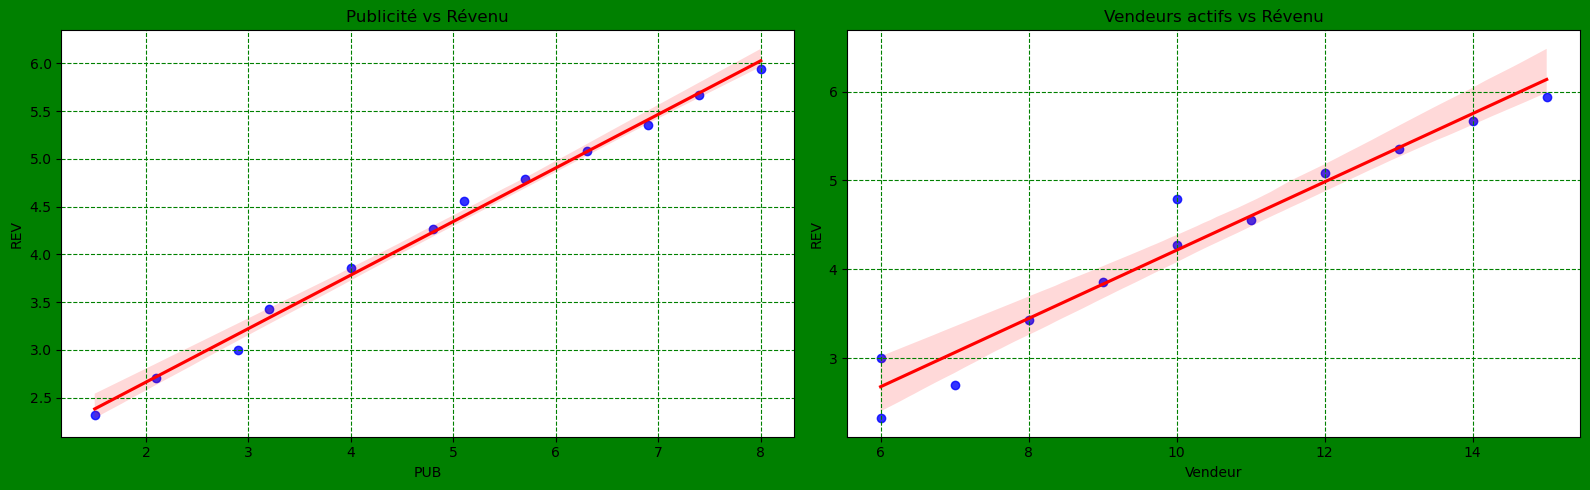

In [6]:
#Linéarisation des données pour appliquer OLS
Y_log=np.log(df["REV"])
#Visualisation après linéarisation
plt.figure(facecolor="g",figsize=(16,5))
plt.subplot(1,2,1)
sns.regplot(x=df["Publicite (X1)"],y=Y_log,scatter_kws={'color':'b'},line_kws={'color':'red'})
plt.title("Publicité vs Révenu")
plt.xlabel("PUB")
plt.ylabel("REV")
plt.grid(linestyle="--",color="g")
plt.subplot(1,2,2)
sns.regplot(x=df["Vendeur (X2)"],y=Y_log,scatter_kws={'color':'b'},line_kws={'color':'red'})
plt.title("Vendeurs actifs vs Révenu")
plt.xlabel("Vendeur")
plt.ylabel("REV")
plt.grid(linestyle="--",color="g")
plt.tight_layout()
plt.show()

In [7]:
#Définition du modele
x=df[["Publicite (X1)","Vendeur (X2)"]]
x=sm.add_constant(x) #Ajout de la constante
y=Y_log
modele=sm.OLS(y,x).fit()
print(modele.summary())

                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     878.7
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           4.81e-11
Time:                        18:18:50   Log-Likelihood:                 13.046
No. Observations:                  12   AIC:                            -20.09
Df Residuals:                       9   BIC:                            -18.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4333      0.156      9.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


In [13]:
#Prevision
modele.predict(x)

0     2.399078
1     2.740935
2     3.122673
3     3.341217
4     3.786444
5     4.231671
6     4.418471
7     4.696838
8     5.070439
9     5.412295
10    5.702466
11    6.044322
dtype: float64

2.7409345062392605